# 1 Author

Student name: Saumil Chakrabarty

Student ID: 220964302


---



# 2 Problem Formulation


---



Using the MLEnd London Sounds Dataset to build a Machine Learning Pipeline that takes as an input an audio segment and predicts whether it has been recorded at a recording area namely Westend.
This is interesting because we can filter the number of recordings done at Westend. This shows the percentage of people who  preferred to record sounds in westend than any other location.

# 3 Machine Learning Pipeline



---



We have used the MLEnd London Sounds dataset, consisting of 2500 audio files and extracted features from it such as pitch, spectral centroid, spectral roll off and MFCC. Then, using Librosa library, we extract meaningful features from it. We have split the dataset into two, namely the training dataset and the test dataset and finally obtain the accuracy after fitting a suitable model to it. We have also shown the difference between two models, namely random forest and logistical regression, and how one is better than the other. This is shown graphically in the image below.

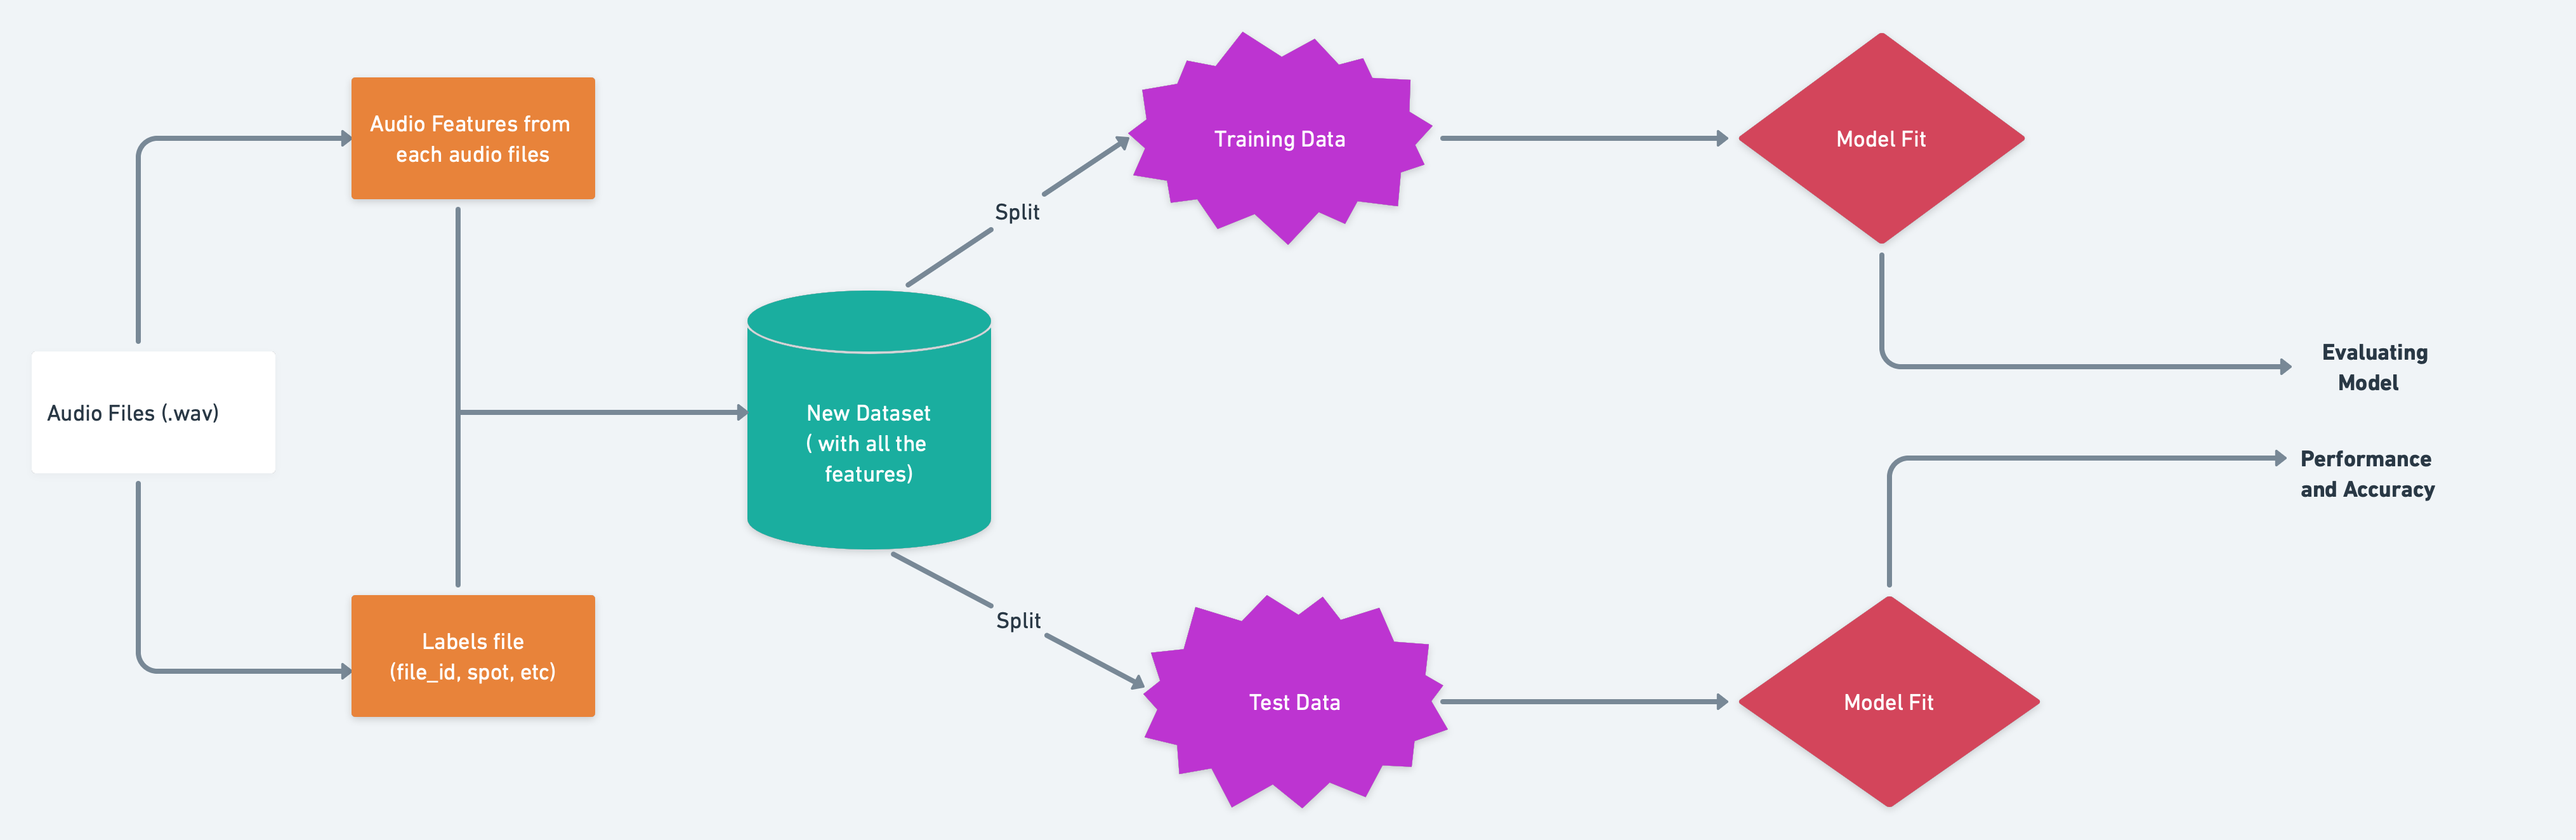

The following few cells will be useful in the preparation of our dataset, and understanding the format of nomenclature in our files.

In [1]:
# Importing libraries and mounting our Google Drive to Colab 

from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
# Checking if our Drive folder contains the required DataSet zip files, and listing the contents of the folder ->

path = '/content/drive/MyDrive/data/MLEndLS'
os.listdir(path)

['1500.wav',
 '1501.wav',
 '1502.wav',
 '1503.wav',
 '1504.wav',
 '1506.wav',
 '1505.wav',
 '1507.wav',
 '1508.wav',
 '1509.wav',
 '1510.wav',
 '1511.wav',
 '1513.wav',
 '1512.wav',
 '1515.wav',
 '1514.wav',
 '1516.wav',
 '1517.wav',
 '1518.wav',
 '1519.wav',
 '1520.wav',
 '1521.wav',
 '1523.wav',
 '1522.wav',
 '1526.wav',
 '1525.wav',
 '1524.wav',
 '1527.wav',
 '1529.wav',
 '1528.wav',
 '1530.wav',
 '1532.wav',
 '1533.wav',
 '1531.wav',
 '1534.wav',
 '1535.wav',
 '1537.wav',
 '1536.wav',
 '1539.wav',
 '1538.wav',
 '1540.wav',
 '1541.wav',
 '1542.wav',
 '1543.wav',
 '1544.wav',
 '1546.wav',
 '1545.wav',
 '1547.wav',
 '1548.wav',
 '1549.wav',
 '1550.wav',
 '1551.wav',
 '1552.wav',
 '1553.wav',
 '1554.wav',
 '1555.wav',
 '1556.wav',
 '1557.wav',
 '1558.wav',
 '1559.wav',
 '1560.wav',
 '1561.wav',
 '1562.wav',
 '1563.wav',
 '1565.wav',
 '1564.wav',
 '1566.wav',
 '1567.wav',
 '1568.wav',
 '1569.wav',
 '1570.wav',
 '1571.wav',
 '1572.wav',
 '1573.wav',
 '1574.wav',
 '1575.wav',
 '1576.wav',

In [3]:
# Checking the number of files present in our dataset ->

sample_path = '/content/drive/MyDrive/data/MLEndLS/*.wav'
files = glob.glob(sample_path)
len(files)

2498

As we can see from the above cell's output, we have 2498 .wav files in our dataset.
Note that we have two corrupt files in our dataset of 2500 files. Hence 2498.

In [4]:
# Reading the MLEndLS.csv file below which shows us the 5 attributes associated to each audio file, which are
# file_id, area, spot, in_out and Participant ->

MLENDLS_df = pd.read_csv('./MLEndLS.csv').set_index('file_id') 
MLENDLS_df

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


In [5]:
# We will now print the file names in our dataset, in order to cross-check if they match with the CSV ->

for file in files:
  print(file.split('/')[-1])

1500.wav
1501.wav
1502.wav
1503.wav
1504.wav
1506.wav
1505.wav
1507.wav
1508.wav
1509.wav
1510.wav
1511.wav
1513.wav
1512.wav
1515.wav
1514.wav
1516.wav
1517.wav
1518.wav
1519.wav
1520.wav
1521.wav
1523.wav
1522.wav
1526.wav
1525.wav
1524.wav
1527.wav
1529.wav
1528.wav
1530.wav
1532.wav
1533.wav
1531.wav
1534.wav
1535.wav
1537.wav
1536.wav
1539.wav
1538.wav
1540.wav
1541.wav
1542.wav
1543.wav
1544.wav
1546.wav
1545.wav
1547.wav
1548.wav
1549.wav
1550.wav
1551.wav
1552.wav
1553.wav
1554.wav
1555.wav
1556.wav
1557.wav
1558.wav
1559.wav
1560.wav
1561.wav
1562.wav
1563.wav
1565.wav
1564.wav
1566.wav
1567.wav
1568.wav
1569.wav
1570.wav
1571.wav
1572.wav
1573.wav
1574.wav
1575.wav
1576.wav
1577.wav
1578.wav
1579.wav
1580.wav
1581.wav
1583.wav
1582.wav
1584.wav
1585.wav
1586.wav
1587.wav
1588.wav
1589.wav
1590.wav
1591.wav
1592.wav
1593.wav
1594.wav
1595.wav
1596.wav
1597.wav
1598.wav
1599.wav
1600.wav
1601.wav
1602.wav
1604.wav
1603.wav
1607.wav
1605.wav
1606.wav
1609.wav
1608.wav
1610.wav
1

In [ ]:
# we filter out the recordings according to the area being "westend"

In [6]:
newDataFrame = MLENDLS_df['area'] == 'westend'
newDataFrame.value_counts()

False    1834
True      666
Name: area, dtype: int64

As Shown above, there are 666 files that have area as 'westend'

# 4 Transformation stage


---



# Data Preprocessing

In [7]:
# We have used the sklearn preprocessing library here ->


from sklearn.preprocessing import LabelBinarizer
df = newDataFrame.copy()
result_df = pd.get_dummies(df,
                     columns = ['area','in_out','spot'])
  
display(result_df)

,False,True
file_id,,
0001.wav,1,0
0002.wav,1,0
0003.wav,1,0
0004.wav,1,0
0005.wav,1,0
...,...,...
2496.wav,0,1
2497.wav,1,0
2498.wav,0,1


As we can see above, we get a binary encoded version of our dataframe. This means that when 1 is placed under 'False' for a particular file, it has not been recorded in our 'Westend'. For example, consider file '0001.wav', we see that a 1 is placed under 'False' and so we conclude that it has not been recorded in 'westend'.

If we consider '2496.wav' as an example, we see that 1 is placed under 'True' for it, which means that it has been recorded in 'westend'.

In [8]:
# some useful metrics about our dataset ->

result_df.describe()

,False,True
count,2500.000000,2500.000000
mean,0.733600,0.266400
std,0.442164,0.442164
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


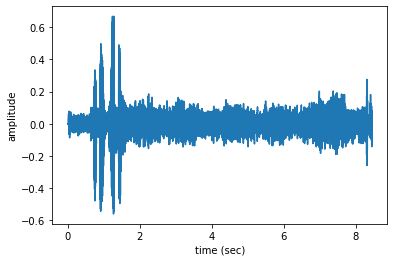

In [9]:
# Just as before, we will again plot one of the audio signals ->

n=0
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

**FEATURE EXTRACTION: PITCH**

In [10]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

**FEATURE EXTRACTION: SPECTRAL CENTROID**

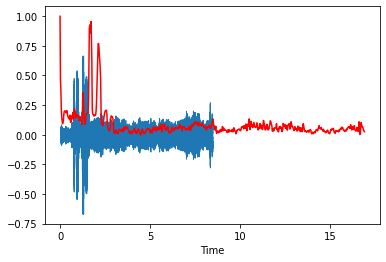

In [11]:
#Spectral Centroid -- centre of mass -- weighted mean of the frequencies present in the sound ->

import sklearn
import librosa.display
spectral_centroids = librosa.feature.spectral_centroid(x, sr= fs)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
    
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, fs)
plt.plot(t, normalize(spectral_centroids), color='r')

**FEATURE EXTRACTION: SPECTRAL ROLLOFF**

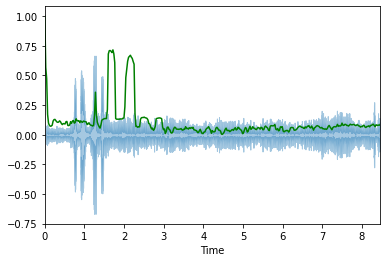

In [12]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=fs)[0]
librosa.display.waveplot(x, sr=fs, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')

**FEATURE EXTRACTION: MFCC**





(20, 728)


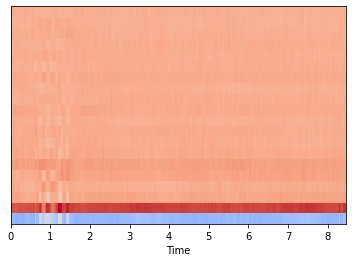

In [13]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

# 5 Modelling


---



In this scenario, we have used two different models and compared the accuracy results of both. The best model for this problem, according to me is 'Logistic Regression'. It gives us a Training Accuracy of 0.74 and a Validation Accuracy of 0.72, which is shown in one of the cells below.

*   It is the best model to use in this case since we can see that the difference between training accuracy and validation accuracy is the *least*.
*   One of the advantages of using logistic regression is that it performs well when the dataset is linearly separable.


*   Another advantage is that it is easy to train and implement.
*   In comparsion, Random Forest gives us a training accuracy of 0.98 and a validation accuracy of 0.65 (shown in one of the cells below).

So, it is clearly evident that Logistic Regression is more apt for our use case.

# 6 Methodology


---



In this case, we will use the 'accuracy' metric to assess the performance of our model. The code cell below shows us how complex an audio signal can be, by giving us the number of samples present in it.

In [14]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 372644 samples


# 7 Dataset


---



We have uploaded the data in a Drive folder, and then mounted it to colab (to give Colab access to it). The next cell defines a function that takes a collection of audio files together with a CSV file and creates a NumPy array containing the 4 audio features used as predictors (X) and a binary label (y) that indicates whether the recording is taken in Westend (y=1) or not in Westend (y=0).

we have used a 'try:' block in our code inside the getXy function. A try block is used for handling exceptions in programming. It ensures that our program is not terminated abruptly due to an exception.

In [15]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]

    try:
    
      yi = labels_file.loc[fileID]['area']=='westend'

      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      xi = [power,pitch_mean,pitch_std,voiced_fr]
      X.append(xi)
      y.append(yi)

    except: 
      print('Issue in file with the index ->' + str(file))

  return np.array(X),np.array(y)

For this, we will take a subset of our original dataset (500 out of 2498 files), and perform suitable operations on it.

In [16]:
X,y = getXy(files[0:499], labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 499/499 [13:51<00:00,  1.67s/it]


In [17]:
# Printing the shape of x and y and the labels vector y ->

print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (499, 4)
The shape of y is (499,)
The labels vector is [False False False False False False  True False False  True False False
 False  True False False False  True False False  True False False False
 False False False False  True  True False False False False False  True
 False False False  True  True False False False False False False False
 False False False False False False False False  True  True  True  True
 False  True False False False False False False False  True False  True
 False False False False False  True False False False  True False False
 False False False False False False False False False  True  True False
 False False False False False False False False False False False False
 False False False  True False  True  True False False False False False
  True  True False False False False False False False False False False
  True False  True False False  True  True False  True  True False False
  True  True False False False  True False  True Fa

In [18]:
# Now we come to the final step for our problem, categorising the audio files (westend/not in westend) ->
print(' The number of recordings in westend is ', np.count_nonzero(y))
print(' The number of recordings not in westend is ', y.size - np.count_nonzero(y))

 The number of recordings in westend is  132
 The number of recordings not in westend is  367


So, it is evident that out of the dataset of 500 recordings that we have taken above, 132 recordings have been done in the westend, while 367 have not been taken in westend.

# SVM

In [19]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((349, 4), (150, 4), (349,), (150,))

In [20]:
# Using SVM, we get the following accuracy metrics ->

from sklearn import preprocessing
import numpy as np
X_train1 = preprocessing.normalize(X_train)
X_val1 = preprocessing.normalize(X_val)

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train1,y_train)

yt_p = model.predict(X_train1)
yv_p = model.predict(X_val1)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.7421203438395415
Validation  Accuracy 0.72
The support vectors are (198, 4)


# LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

74.79

In [22]:
yt_p = logreg.predict(X_train)
yv_p = logreg.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.7478510028653295
Validation  Accuracy 0.7266666666666667


In [23]:
logreg.fit(X_train1,y_train)
yt_p = logreg.predict(X_train1)
yv_p = logreg.predict(X_val1)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.7421203438395415
Validation  Accuracy 0.72


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_val)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [25]:
yt_p = random_forest.predict(X_train)
yv_p = random_forest.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 1.0
Validation  Accuracy 0.7133333333333334


In [26]:
random_forest.fit(X_train1, y_train)
yt_p = random_forest.predict(X_train1)
yv_p = random_forest.predict(X_val1)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.9885386819484241
Validation  Accuracy 0.6533333333333333


# 8 Result


---



In [27]:
# Categorising the audio files (campus/not in campus) ->

print(' The number of recordings taken in westend is: ', np.count_nonzero(y))
print(' The number of recordings not taken in westend is: ', y.size - np.count_nonzero(y))

 The number of recordings taken in westend is:  132
 The number of recordings not taken in westend is:  367


This is the solution to the final part of our project where in recordings taken in westend are 132 and number of recordings not taken in westend are 367 out of the 500 files considered of total 2498  recording files.

# 9 Conclusion


---



By building this Machine Learning model to solve our problem, we draw the following conclusions:




*   The best model to use in this case according to me is Logistic Regression.
*   We obtain a training accuracy of 0.74 using logistic regression.


*   We obtain a validation accuracy of 0.72 using logistic regression.


*   Lastly, the number of recordings taken in westend is 132 and number of recordings not taken in westend  is 367.